In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as ml
%matplotlib inline
ml.style.use('ggplot')

In [22]:
df = pd.read_csv('headbrain.csv')

In [23]:
print(df.shape)

(237, 4)


In [24]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# 1. Separating X and Y

In [25]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values
X.shape,Y.shape

((237,), (237,))

In [26]:
import seaborn as sns

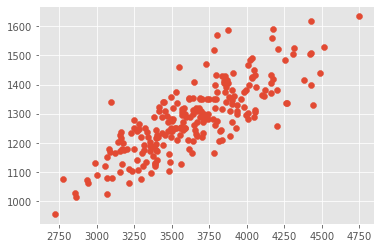

<Figure size 3600x2304 with 0 Axes>

In [27]:
plt.scatter(X,Y,)
plt.figure(figsize=(50,32))
plt.show()

In [28]:
# Mean X and Y
mn_x = np.mean(X)
mn_y = np.mean(Y)
total = len(X)    # Total number of values

# 2. Calculation of coefficients

In [29]:
# Using the formula to calculate b0 and b1
n = 0
d = 0
for i in range(total):
    n = n + ((X[i] - mn_x) * (Y[i] - mn_y))
    d = d + ((X[i] - mn_x) ** 2)
b1 = n / d                               # B1 = (summation([x[i] - x_mean]*(y[i] - y_mean)))/((summation(x[i] - x_mean))^2)
b0 = mn_y - (b1 * mn_x)                  # B0 = y_mean - (B1*x_mean)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


In [30]:
# Y = B0 + B1*X
# Brain_Weight = 325.573421049 + (0.263429339489 * Head_Size)         

# This is our linear model

# Now plotting it to obtain best fit curve

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# 3. Final plotting

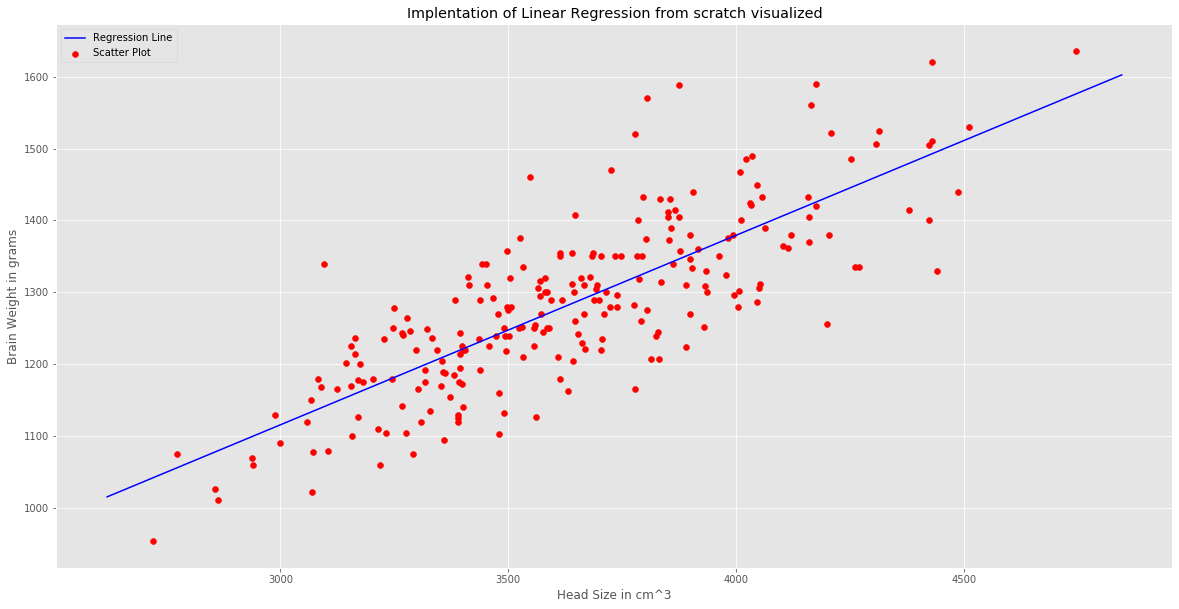

In [31]:
# Plotting
plt.figure(figsize=(20,10))
# Ploting Line based on linear model made from scratch

plt.plot(x, y, color='blue', label='Regression Line')
# Ploting Scatter Points of our actual dataset to see how well the model performs

plt.scatter(X, Y, c='red', label='Scatter Plot')
plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.title("Implentation of Linear Regression from scratch visualized")
plt.legend()
plt.show()

# 4. Implementation of SKlearn

In [164]:
#splitting the data

np.random.seed(seed=7)#makes result reproducible

msk = np.random.rand(len(df)) < 0.5
traindf = df[msk]
evaldf = df[~msk]

In [165]:
len(traindf)

121

In [166]:
len(evaldf)

116

In [167]:
#preparing the data and dividing it into X and Y

In [168]:
X_train = traindf['Head Size(cm^3)'].values
Y_train = traindf['Brain Weight(grams)'].values

In [169]:
X_test = evaldf['Head Size(cm^3)'].values
Y_test = evaldf['Brain Weight(grams)'].values

In [170]:
# Can not use rank 1 matrix in Sklearn
X_test = X_test.reshape((len(X_test),1))
X_train = X_train.reshape((len(X_train),1))

In [171]:
len(X_train)

121

In [172]:
#IMPORTING SK LEARN LINEAR REGRESSION

In [198]:
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression(normalize="Boolean")

In [199]:
regressor1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='Boolean')

In [200]:
def brain(year):
    test=np.array([year])
    sal=int(regressor1.predict(test[0].reshape(1,1)))
   
    return sal

In [201]:
brain(3500)

1237

In [202]:
Y_pred = regressor1.predict(X)

In [203]:
from sklearn.metrics import mean_squared_error

In [210]:
# Calculating RMSE and R^2 Score
# mse = mean_squared_error(Y, Y_pred)
# rmse = np.sqrt(mse)

mean_sqr=mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2_score = regressor1.score(X, Y)



In [214]:
print("MEAN SQUARED ERROR=",mean_sqr)

MEAN SQUARED ERROR= 5307.855623557423


In [215]:
print('RMSE=',rmse)

RMSE= 72.85503155964881


In [216]:
print('R2 SCORE',r2_score)

R2 SCORE 0.6319284818673969


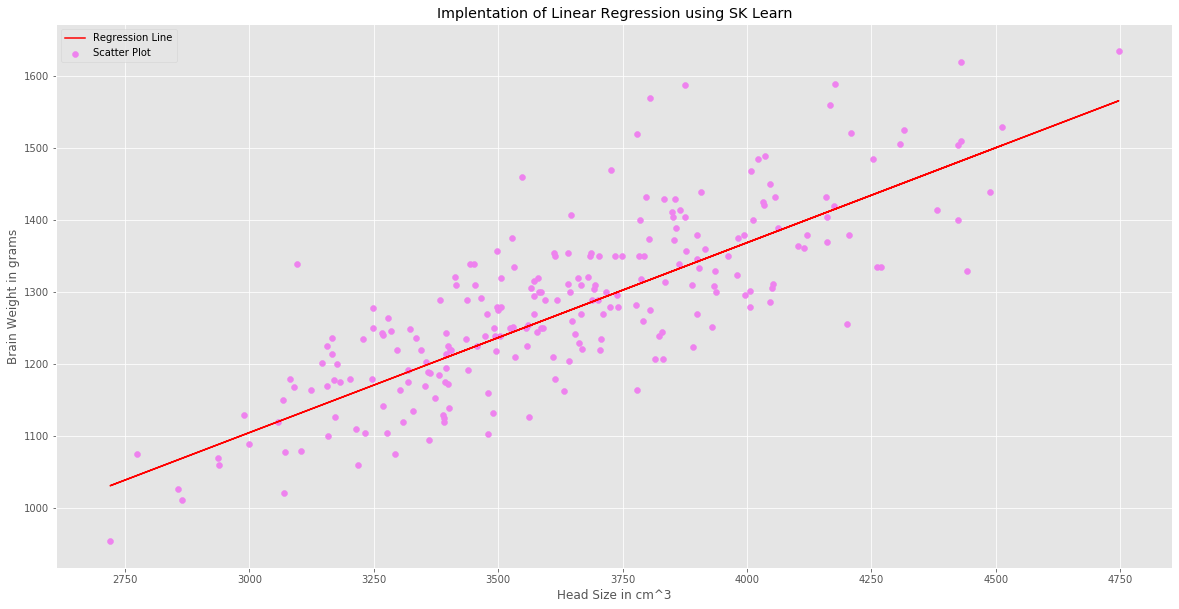

In [217]:
# Plotting
plt.figure(figsize=(20,10))
# Ploting Line based on linear model made from scratch

plt.plot(X, Y_pred, color='red', label='Regression Line')
# Ploting Scatter Points of our actual dataset to see how well the model performs

plt.scatter(X, Y, c='violet', label='Scatter Plot')
plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.title("Implentation of Linear Regression using SK Learn")
plt.legend()
plt.show()

In [218]:
#just some seaborn

import seaborn as sns

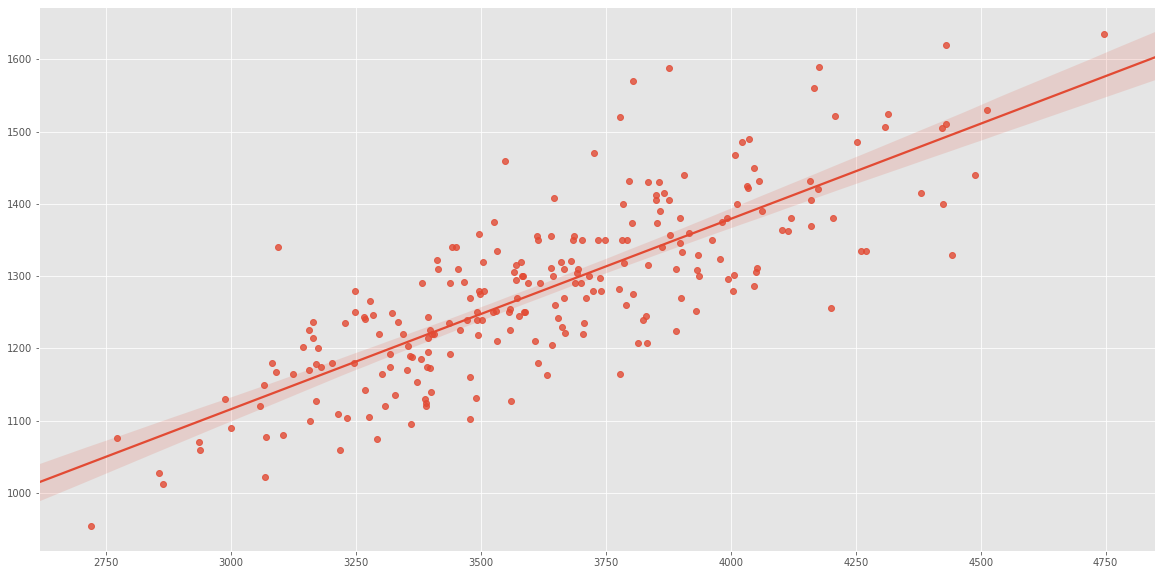

In [219]:
plt.figure(figsize=(20,10))
sns.regplot(X,Y)